In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22,'lines.linewidth': 2})

In [2]:
# solvers u_t + [u^2/2]_x = 0
# nu = k/h

def Lax_Friedrichs(U0,nu,f,Nsteps):
    U = np.zeros((len(U0),Nsteps+1))
    U[:,0] = U0
    for n in range(Nsteps):
        # Uj-1 -> np.roll(Uj,1)
        U[:,n+1] = (np.roll(U[:,n],1)+np.roll(U[:,n],-1))/2 - nu*(f(np.roll(U[:,n],-1))-f(np.roll(U[:,n],1)))/2
    return U

def Richtmeyer(U0,nu,f,Nsteps):
    U = np.zeros((len(U0),Nsteps+1))
    U[:,0] = U0
    for n in range(Nsteps):
        # (Uj+Uj+1)/2 - nu*(f(U_j+1)-f(U_j))
        Uh = (U[:,n]+np.roll(U[:,n],-1))/2 - nu*(f(np.roll(U[:,n],-1)) - f(U[:,n]))/2
        #
        U[:,n+1] = U[:,n] - nu*(f(Uh)-f(np.roll(Uh,1)))
    return U

def MacCormack(U0,nu,f,Nsteps):
    U = np.zeros((len(U0),Nsteps+1))
    U[:,0] = U0
    for n in range(Nsteps):
        # Uj-1 -> np.roll(Uj,1)
        # U_j^*
        Us = U[:,n] - nu*(f(U[:,n])-f(np.roll(U[:,n],1)))
        U[:,n+1] = (U[:,n]+Us)/2 - nu*(f(Us)-f(np.roll(Us,1)))/2
    return U

def Godunov(U0,nu,f,Nsteps):
    U = np.zeros((len(U0),Nsteps+1))
    U[:,0] = U0
    for n in range(Nsteps):
        # F values F(Uj,Uj+1)
        F = np.zeros(len(U[:,n]))
        UR= np.roll(U[:,n],-1)
        for j in range(len(U[:,n])):
            uL = U[j,n]
            uR = UR[j]
            if uL <= uR:
                # only zero possible f'=0
                # only a local min
                if uL<0 and uR>0:
                    F[j] = f(0)
                else:
                    F[j] = min(f(uL),f(uR))
            else:
                F[j] = max(f(uL),f(uR))
        U[:,n+1] = U[:,n] - nu*(F - np.roll(F,1))
    return U

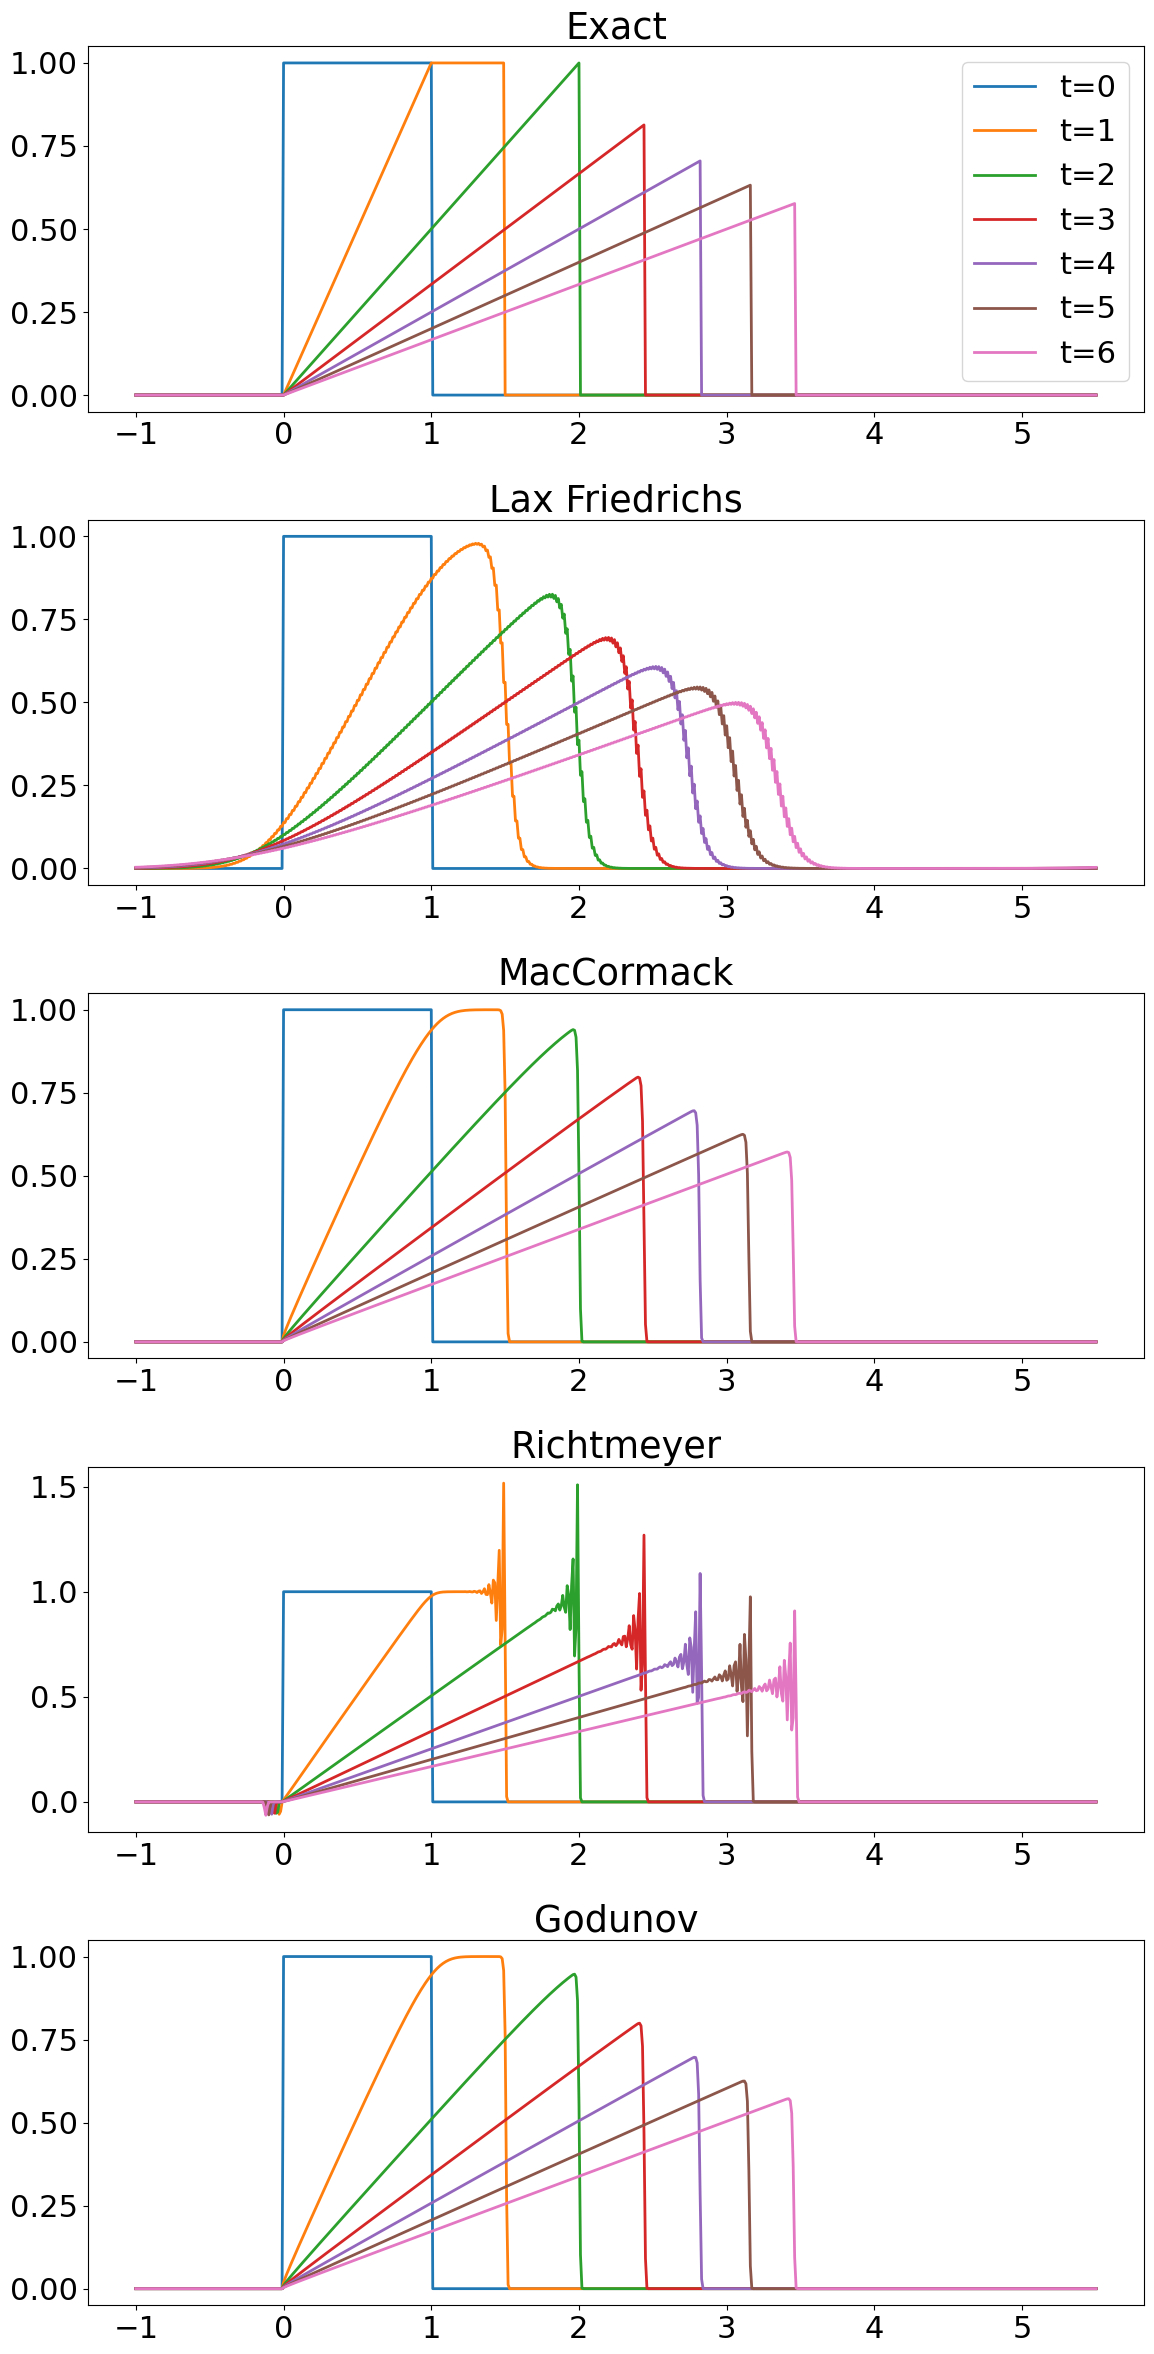

In [3]:
# initial conditions, conservation law function, exact solution
u0 = lambda x: (x >= 0)*(x<=1)
func = lambda x: x**2/2
u = lambda x,t: (x/t*(x>=0)*(x<=t) + (x>t)*(x<(1+t/2)))*(t<=2) + (x/t*(x>=0)*(x<=np.sqrt(2*t)))*(t>2)

h = .01
nu = 1/4
k = h*nu

xvec = np.around(np.arange(-1,5.5+h,h),decimals=3)
tvec = np.around(np.arange( 0,6+k,k),decimals=3)
Nsteps = round(6/k)

fig, ax = plt.subplots(5,1,figsize=(12,24))

# real solution
ax[0].plot(xvec,u0(xvec))
for i in range(1,7):
    ax[0].plot(xvec,u(xvec,i))

for row,method in enumerate([Lax_Friedrichs,MacCormack,Richtmeyer,Godunov]):

    LF = method(u0(xvec),nu,func,Nsteps)

    for i in range(7):
        index = round(i*Nsteps/6)
        ax[row+1].plot(xvec,LF[:,index])
        
for row,title in enumerate(['Exact','Lax Friedrichs','MacCormack','Richtmeyer','Godunov']):
    ax[row].set_title(title)
    
ax[0].legend(['t=0','t=1','t=2','t=3','t=4','t=5','t=6'])
plt.tight_layout()
plt.savefig('P3.pdf')